In [180]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb

In [181]:
df = pd.read_csv("Diamonds Prices2022.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [182]:
df.columns = df.columns.str.upper()
df.rename(columns={'DEPTH':'DEPTH%'}, inplace=True)
df

,UNNAMED: 0,CARAT,CUT,COLOR,CLARITY,DEPTH%,TABLE,PRICE,X,Y,Z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UNNAMED: 0  53943 non-null  int64  
 1   CARAT       53943 non-null  float64
 2   CUT         53943 non-null  object 
 3   COLOR       53943 non-null  object 
 4   CLARITY     53943 non-null  object 
 5   DEPTH%      53943 non-null  float64
 6   TABLE       53943 non-null  float64
 7   PRICE       53943 non-null  int64  
 8   X           53943 non-null  float64
 9   Y           53943 non-null  float64
 10  Z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


We are trying to find out how many unique value we have in this dataset.

In [184]:
df.nunique()

UNNAMED: 0    53943
CARAT           273
CUT               5
COLOR             7
CLARITY           8
DEPTH%          184
TABLE           127
PRICE         11602
X               554
Y               552
Z               375
dtype: int64

In [185]:
df['CUT'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [186]:
df['COLOR'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [187]:
df['CLARITY'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

Here, we seperate categorical and numerical data

In [188]:
dfnum = df.select_dtypes(include= ['int64','float64','bool'])
dfnum

,UNNAMED: 0,CARAT,DEPTH%,TABLE,PRICE,X,Y,Z
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53938,53939,0.86,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,59.8,62.0,2756,5.74,5.73,3.43


In [189]:
dfcat = df[['CUT', 'COLOR', 'CLARITY', 'PRICE']]
dfcat

,CUT,COLOR,CLARITY,PRICE
0,Ideal,E,SI2,326
1,Premium,E,SI1,326
2,Good,E,VS1,327
3,Premium,I,VS2,334
4,Good,J,SI2,335
...,...,...,...,...
53938,Premium,H,SI2,2757
53939,Ideal,D,SI2,2757
53940,Premium,E,SI1,2756
53941,Premium,F,SI1,2756


We realised that the first column "UNNAMED: 0" is not needed, so we use the drop function to remove the column.

In [190]:
dfnum = df.drop("UNNAMED: 0", axis = 1)
dfnum.head()

,CARAT,CUT,COLOR,CLARITY,DEPTH%,TABLE,PRICE,X,Y,Z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [191]:
dfnum.isnull().sum()

CARAT      0
CUT        0
COLOR      0
CLARITY    0
DEPTH%     0
TABLE      0
PRICE      0
X          0
Y          0
Z          0
dtype: int64

In [192]:
dfnum.describe()

,CARAT,DEPTH%,TABLE,PRICE,X,Y,Z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Here we remove rows with x = 0 or y = 0 or z = 0

In [193]:
dfnum = dfnum[(dfnum['X']!=0) & (dfnum['Y']!=0) & (dfnum['Z']!=0)]
dfnum

,CARAT,CUT,COLOR,CLARITY,DEPTH%,TABLE,PRICE,X,Y,Z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [194]:
dfnum.describe()

,CARAT,DEPTH%,TABLE,PRICE,X,Y,Z
count,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000
mean,0.797693,61.749432,57.456902,3930.927879,5.731628,5.734888,3.540042
std,0.473783,1.432336,2.234123,3987.179153,1.119392,1.140094,0.702511
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.500000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Since DEPTH is derived from x,y and z. We are goinf to drop x,y,z out from our dataset.

In [195]:
dfnum = dfnum[['CARAT', 'DEPTH%', 'TABLE', 'PRICE']]
dfnum

,CARAT,DEPTH%,TABLE,PRICE
0,0.23,61.5,55.0,326
1,0.21,59.8,61.0,326
2,0.23,56.9,65.0,327
3,0.29,62.4,58.0,334
4,0.31,63.3,58.0,335
...,...,...,...,...
53938,0.86,61.0,58.0,2757
53939,0.75,62.2,55.0,2757
53940,0.71,60.5,55.0,2756
53941,0.71,59.8,62.0,2756


Now we are trying to do some preliminary EDA, we look at the correlation of carat, depth, table to price

,CARAT,DEPTH%,TABLE,PRICE
CARAT,1.000000,0.028269,0.181630,0.921592
DEPTH%,0.028269,1.000000,-0.295753,-0.010712
TABLE,0.181630,-0.295753,1.000000,0.127229
PRICE,0.921592,-0.010712,0.127229,1.000000


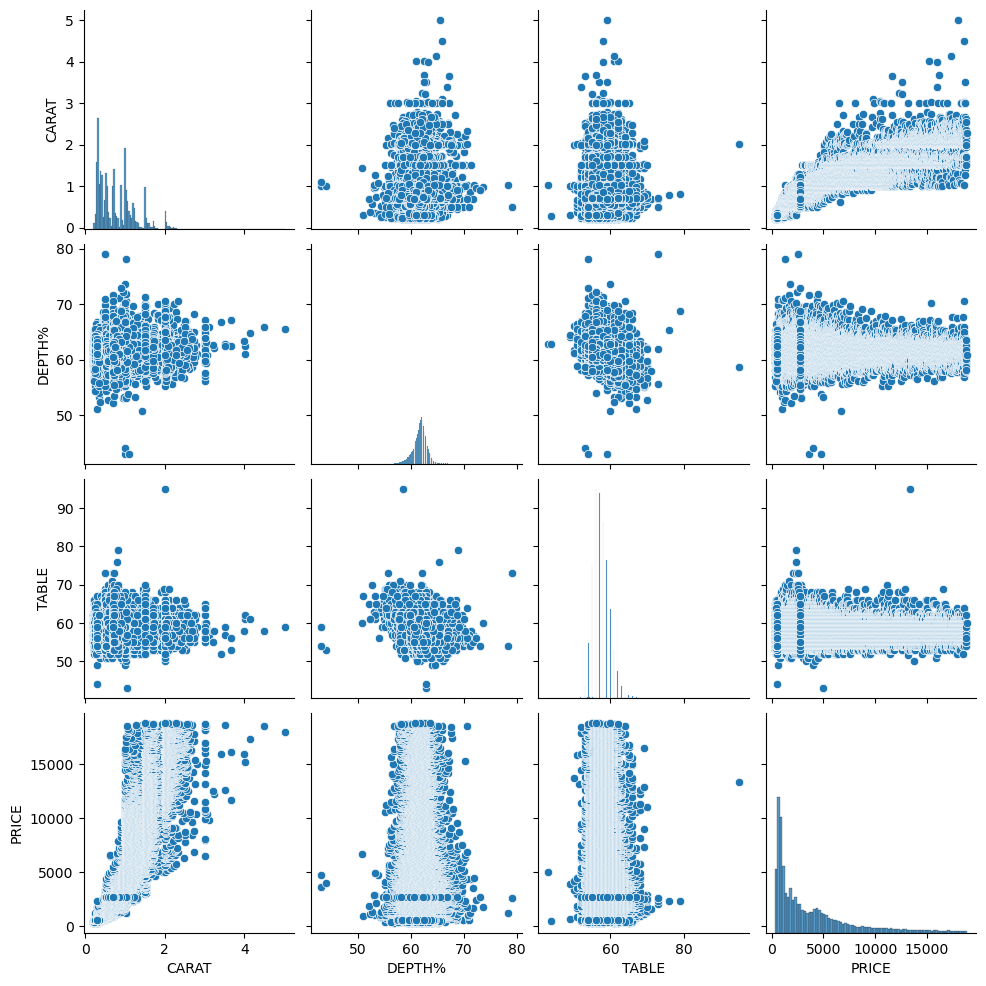

In [196]:
sb.pairplot(data = dfnum)
dfnum.corr()

<AxesSubplot:>

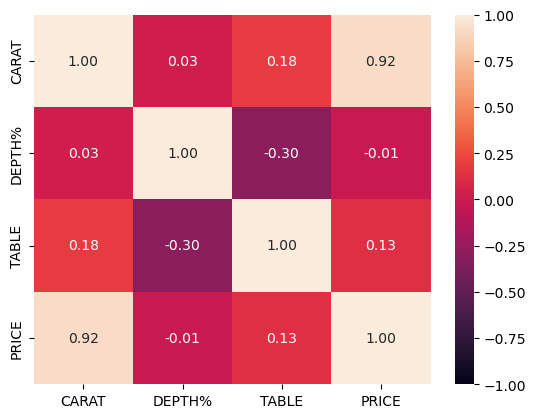

In [197]:
sb.heatmap(dfnum.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

From the heatmap, we can see that carat has a very strong correlation to the price of the diamond, theremore, it could be a good predictor to predict the price of diamond.

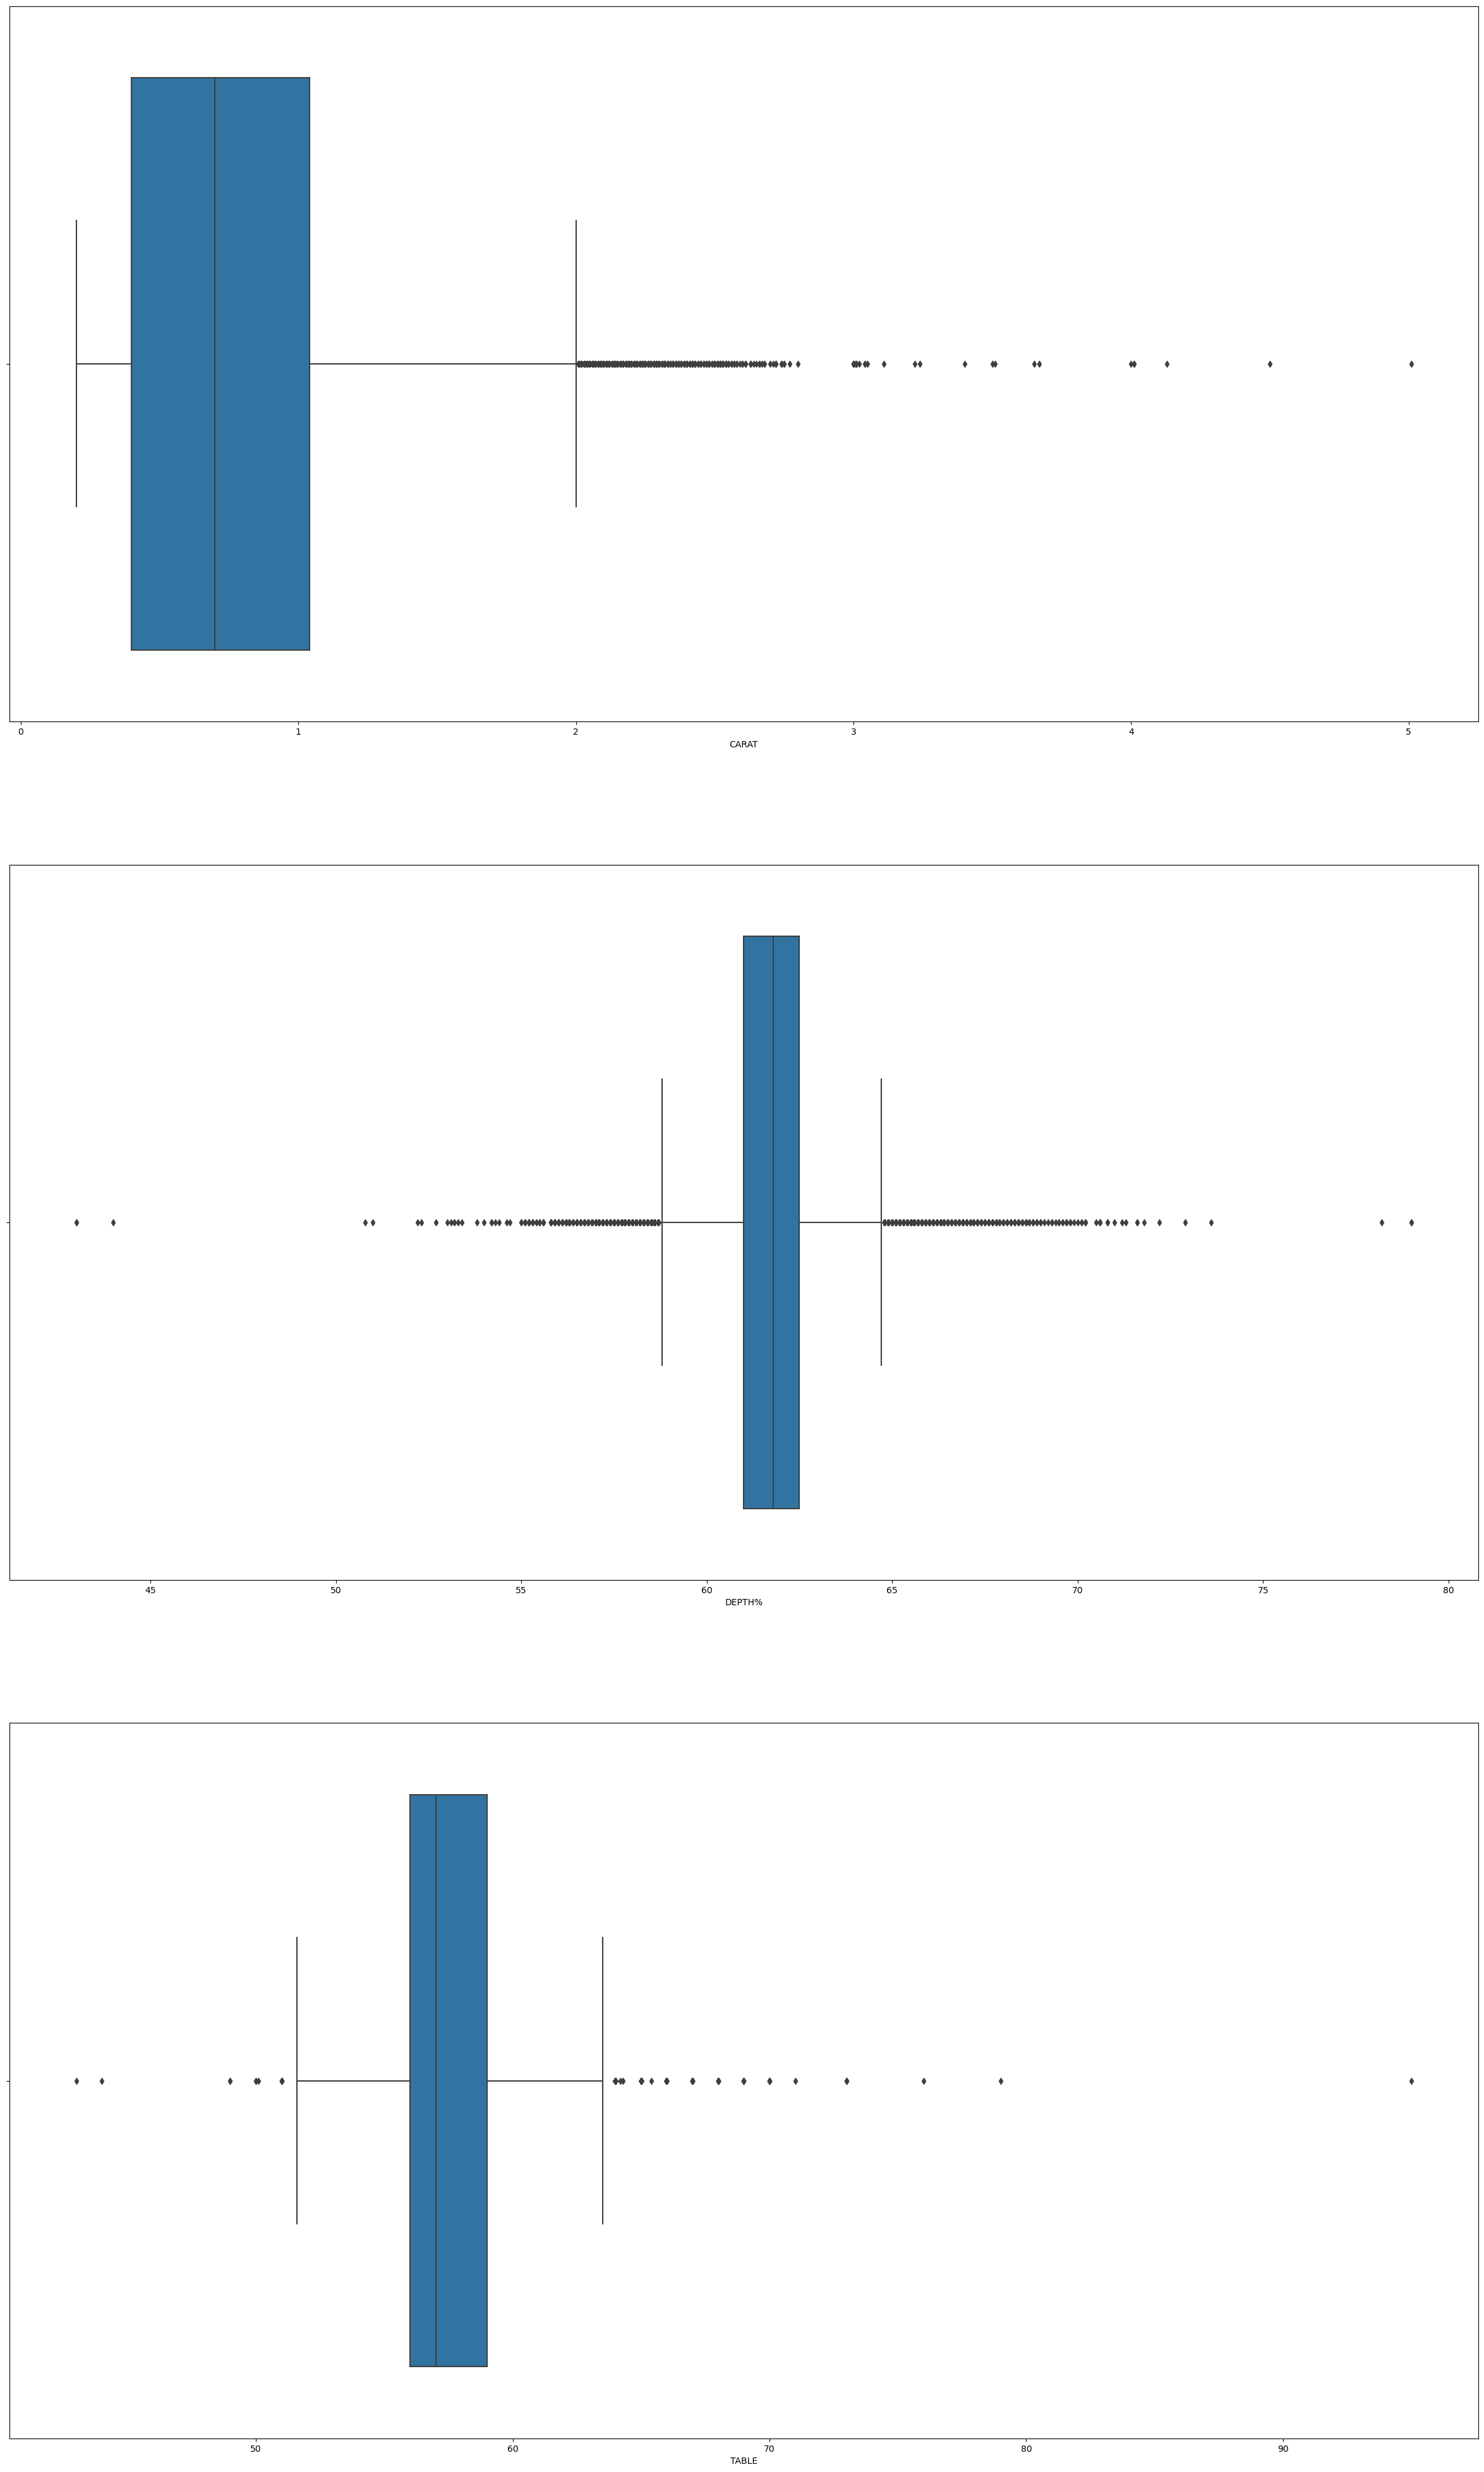

In [198]:
f, ax = plt.subplots(3,1, figsize=(30,50))
sb.boxplot(x='CARAT', data=dfnum, ax=ax[0])
sb.boxplot(x='DEPTH%', data=dfnum, ax=ax[1])
sb.boxplot(x='TABLE', data=dfnum, ax=ax[2])

plt.show()

We are trying to remove outliers here

In [199]:
def remove_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    new_df = df.drop(df[(df[col_name] < lower_bound) | (df[col_name] > upper_bound)].index)
    return new_df

dfnum = remove_outliers(dfnum, 'CARAT')
dfnum = remove_outliers(dfnum, 'DEPTH%')
dfnum = remove_outliers(dfnum, 'TABLE')
dfnum

,CARAT,DEPTH%,TABLE,PRICE
0,0.23,61.5,55.0,326
1,0.21,59.8,61.0,326
3,0.29,62.4,58.0,334
4,0.31,63.3,58.0,335
5,0.24,62.8,57.0,336
...,...,...,...,...
53938,0.86,61.0,58.0,2757
53939,0.75,62.2,55.0,2757
53940,0.71,60.5,55.0,2756
53941,0.71,59.8,62.0,2756


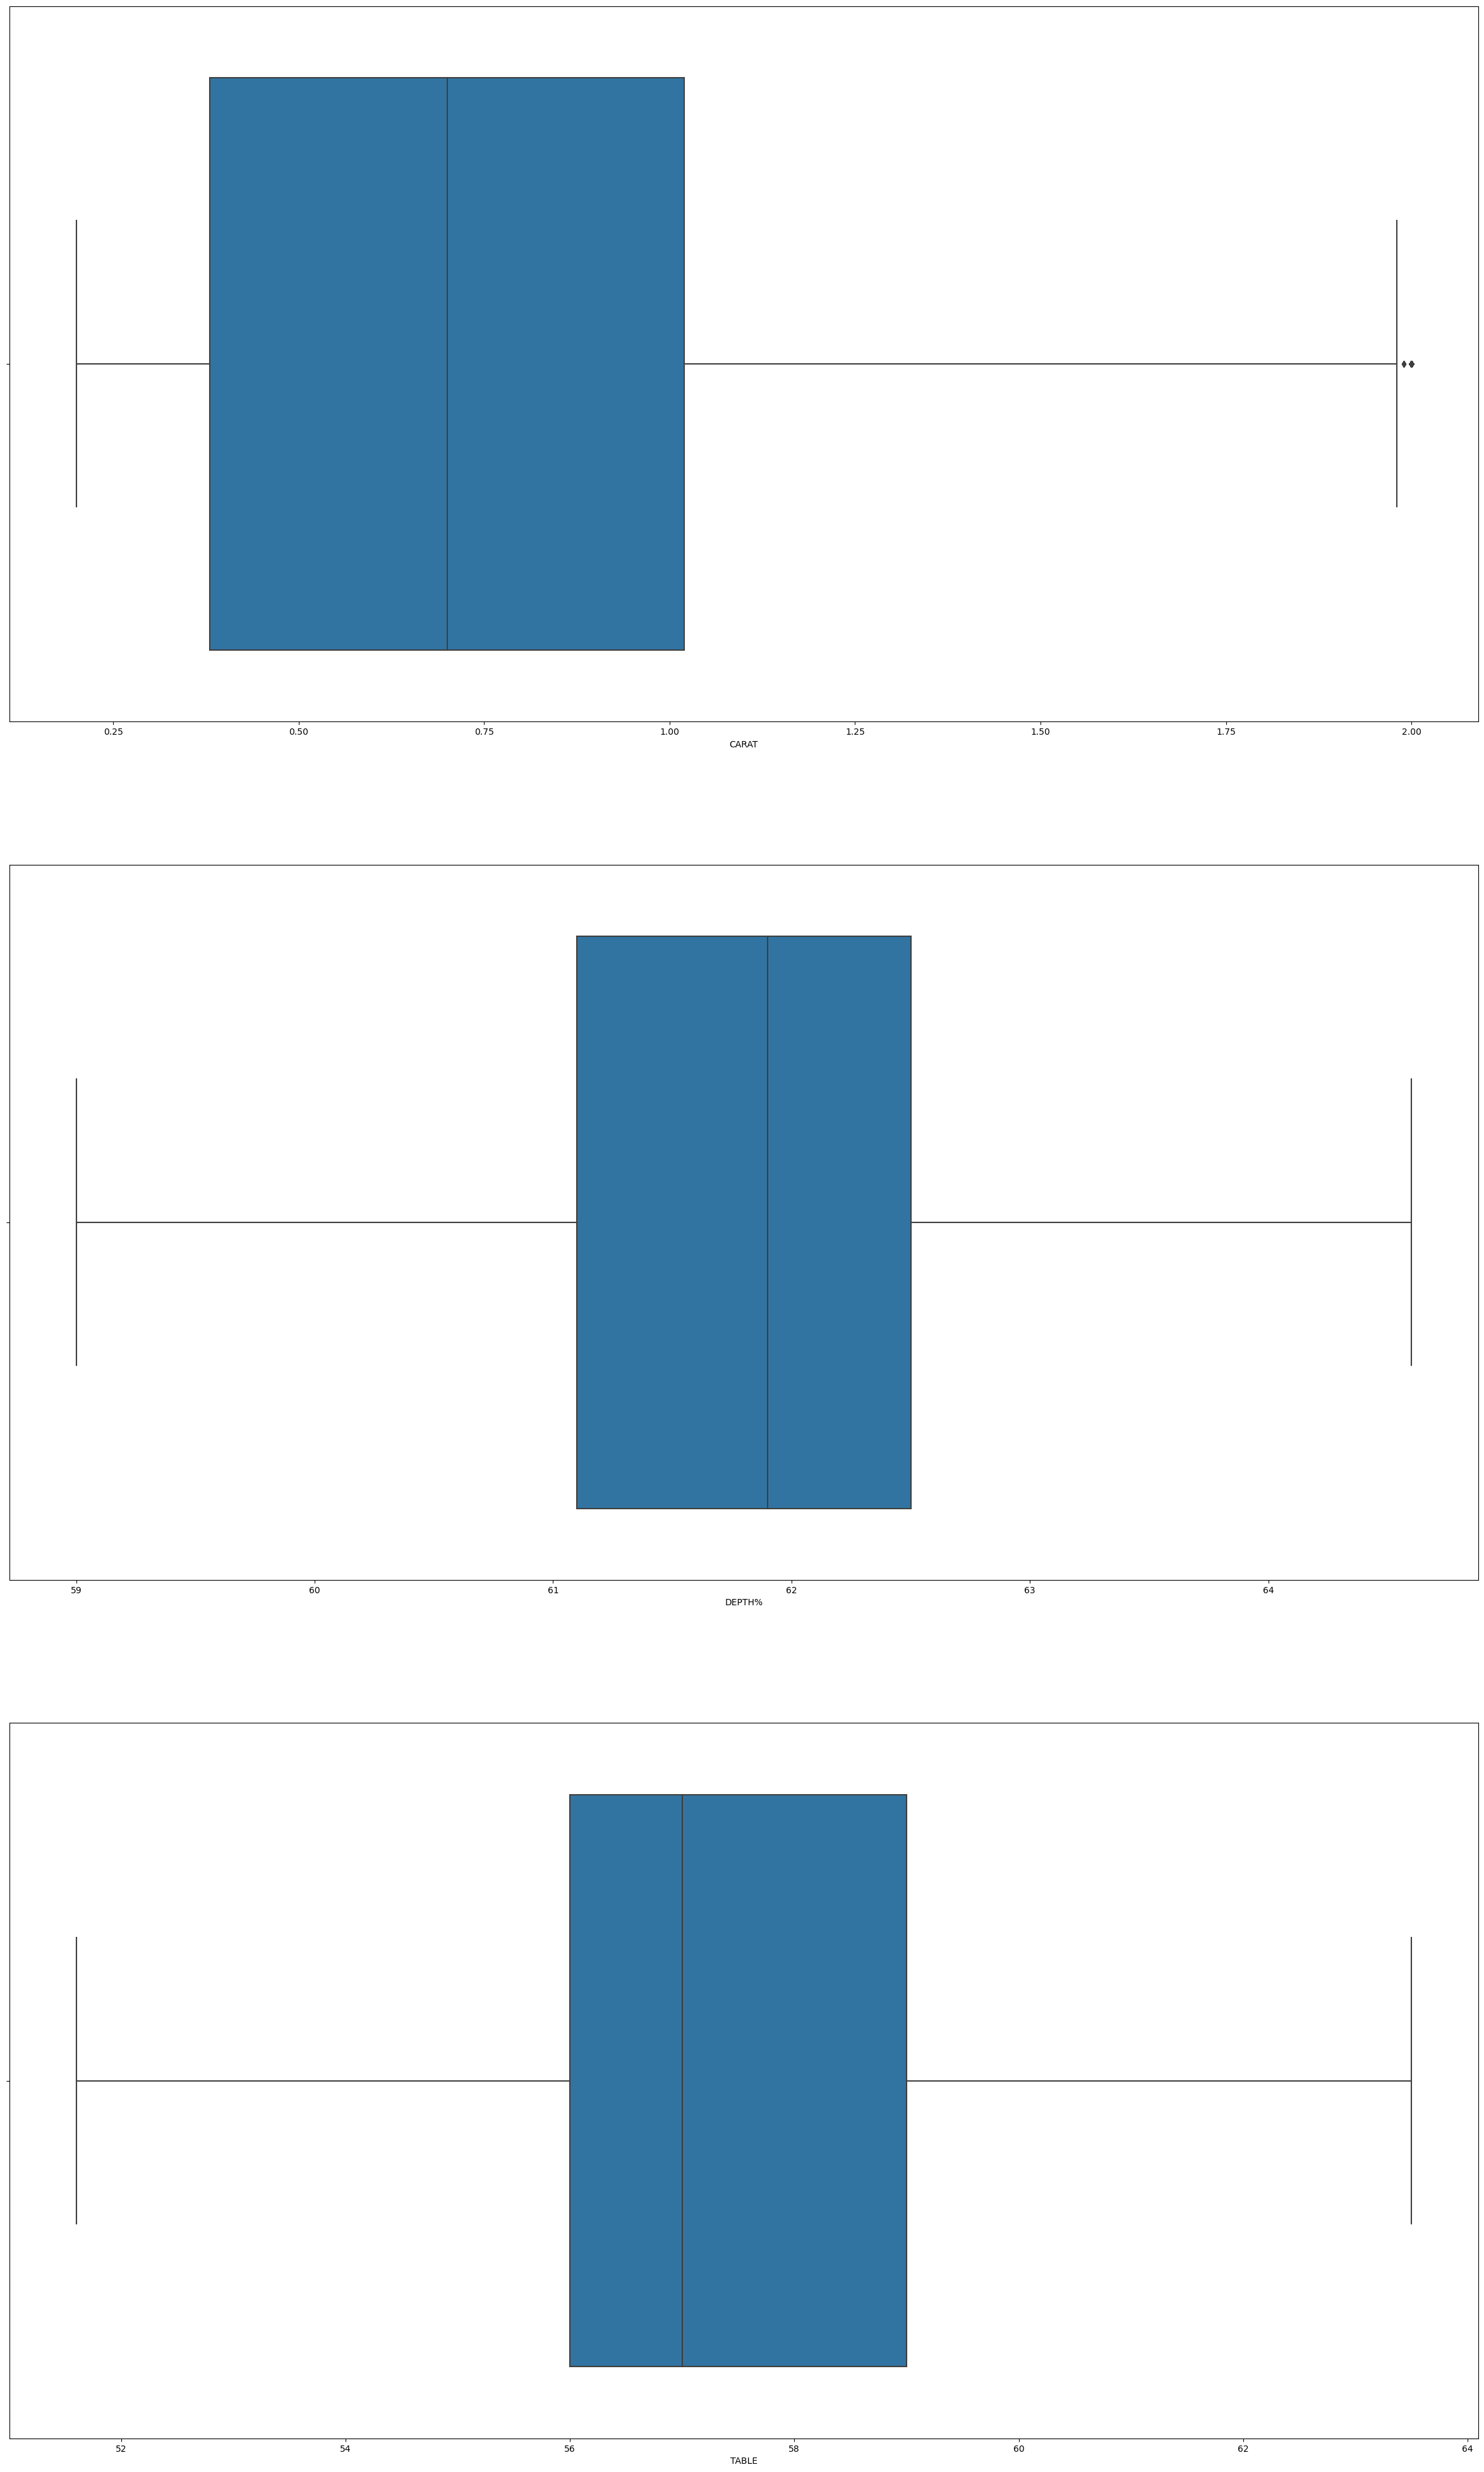

In [200]:
f, ax = plt.subplots(3,1, figsize=(30,50))
sb.boxplot(x='CARAT', data=dfnum, ax=ax[0])
sb.boxplot(x='DEPTH%', data=dfnum, ax=ax[1])
sb.boxplot(x='TABLE', data=dfnum, ax=ax[2])

plt.show()

In [201]:
dfnum.corr()

,CARAT,DEPTH%,TABLE,PRICE
CARAT,1.000000,0.032041,0.181071,0.909168
DEPTH%,0.032041,1.000000,-0.229169,-0.000942
TABLE,0.181071,-0.229169,1.000000,0.121862
PRICE,0.909168,-0.000942,0.121862,1.000000


<AxesSubplot:>

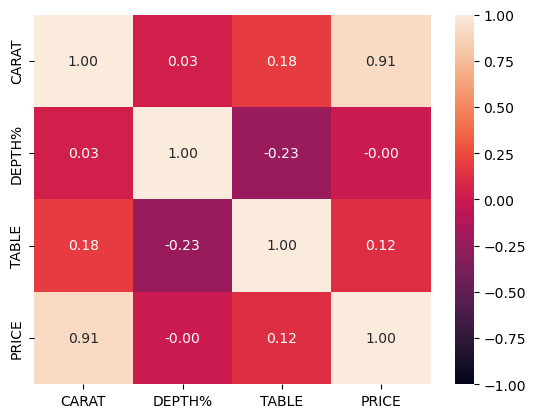

In [202]:
sb.heatmap(dfnum.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

After outliers removal, the heatmap shows that 'CARAT' has a very strong correlation with 'PRICE', with a correlation of 0.91. Therefore, 'CARAT' could be a good predictor of 'PRICE'.